In [22]:
#import tdt
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [23]:
with open('C://Data//hislight_pickles//restricted_dark.pickle', 'rb') as handle:
    restricted_dark = pickle.load(handle)

In [24]:
mice_to_exclude = []
#"HL202", "HL205", "HL206", "HL211" have not great placements

In [25]:
list_of_mice = []

for key, val in restricted_dark.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in list_of_mice :
            list_of_mice.append(val["mouse_ID"])

In [26]:
list_of_mice

['HL202',
 'HL203',
 'HL204',
 'HL205',
 'HL206',
 'HL207',
 'HL208',
 'HL209',
 'HL210',
 'HL211',
 'HL212']

In [55]:
snips_mean_start= []
snips_mean_end = []


    
kwargs={"bins":150, "trial_length":15, "baseline_length":5}    
    
for mouse in list_of_mice:
    snips_start= []
    snips_end= []
    
    for key, val in restricted_dark.items():
        if val["mouse_ID"] == mouse:
            lickdata= tp.lickCalc(val["licks"], minrunlength=3)
       
            snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
            snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])
        
    snips_start = np.vstack(snips_start)
    snips_end = np.vstack(snips_end)
    
    snips_mean_start.append(np.mean(snips_start, axis=0))
    snips_mean_end.append(np.mean(snips_end, axis=0))
    
    

<ipython-input-54-1dae9a7d3ccf>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(["-5", "0", "5", "10", "15"])


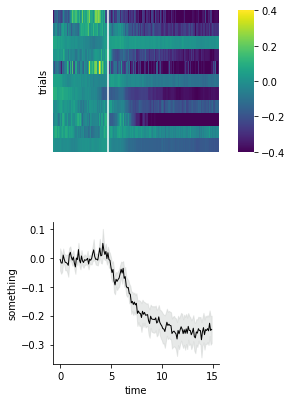

In [54]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[4,6.5],
                                        gridspec_kw={"width_ratios":[10,1], "left":0.2, "hspace":0.5})



sns.heatmap(snips_mean_start, ax=ax1, cbar_ax= ax2, cmap="viridis", vmax=0.4, vmin=-0.4)
tp.shadedError(ax3, snips_mean_start)
ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="white")

ax3.set_xticklabels(["-5", "0", "5", "10", "15"])

#ax3.set_xticks([0, 50, 100, 150], labels=["-5", "0", "5", "10"])

ax3.set_xlabel("time")
ax3.set_ylabel("something")
ax1.set_ylabel("trials")

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)


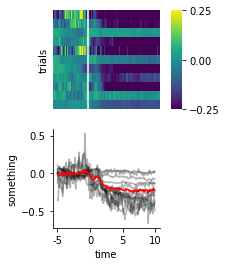

In [43]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[3,4],
                                        gridspec_kw={"width_ratios":[10,1], "left":0.2, "right":0.8})



sns.heatmap(snips_mean_start, ax=ax1, cbar_ax= ax2, cmap="viridis", vmax=0.25, vmin=-0.25, cbar_kws={"ticks": [0.25, 0, -0.25]})
for snip in snips_mean_start:
    ax3.plot(snip, alpha=0.3, color="black")
ax3.plot(np.mean(snips_mean_start, axis=0),  color="red")
    

ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="white")

ax3.set_xticks([0, 50, 100, 150])
ax3.set_xticklabels(["-5", "0", "5", "10"])

ax3.set_xlabel("time")
ax3.set_ylabel("something")
ax1.set_ylabel("trials")

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\grouped_run_start.pdf")

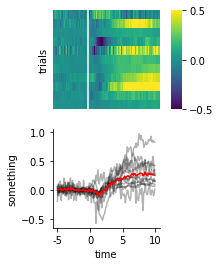

In [48]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[3,4],
                                        gridspec_kw={"width_ratios":[10,1], "left":0.2, "right":0.8})



sns.heatmap(snips_mean_end, ax=ax1, cbar_ax= ax2, cmap="viridis", vmax=0.5, vmin=-0.5, cbar_kws={"ticks": [0.5, 0, -0.5]})
for snip in snips_mean_end:
    ax3.plot(snip, alpha=0.3, color="black")
ax3.plot(np.mean(snips_mean_end, axis=0), color="red")
    

ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="white")

ax3.set_xticks([0, 50, 100, 150])
ax3.set_xticklabels(["-5", "0", "5", "10"])

ax3.set_xlabel("time")
ax3.set_ylabel("something")
ax1.set_ylabel("trials")

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\grouped_run_end.pdf")